# Use CSV instead

In [6]:
from google.colab import files
import pandas as pd

In [7]:
uploaded = files.upload()

Saving eth_timeseries_hourly.csv to eth_timeseries_hourly.csv


In [33]:
# Read csv to pandas
# Load the uploaded CSV file as a DataFrame
from io import StringIO
uploaded_file = uploaded["eth_timeseries_hourly.csv"]  # Access the file from the uploaded dictionary
df = pd.read_csv(StringIO(uploaded_file.decode("utf-8")), delimiter=';')  # Decode bytes to string and read into DataFram
df.head()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,social_volume_calc_24h,social_score_calc_24h
0,2,1567036800,29.8.2019 0:00,173.13,168.95,173.17,164.19,NaN,NaN,1.823020e+10,...,NaN,NaN,NaN,12708,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1567123200,30.8.2019 0:00,167.61,168.52,170.47,165.95,NaN,NaN,1.820780e+10,...,NaN,NaN,NaN,11852,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1567209600,31.8.2019 0:00,168.92,172.15,174.99,166.29,NaN,NaN,1.856412e+10,...,NaN,NaN,NaN,9138,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1567296000,1.9.2019 0:00,172.97,171.42,173.88,168.24,NaN,NaN,1.849572e+10,...,NaN,NaN,NaN,8549,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1567382400,2.9.2019 0:00,171.45,178.76,181.47,170.77,NaN,NaN,1.919514e+10,...,NaN,NaN,NaN,11087,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# prompt: Drop all columns apart from: "asset_id", "timestamp", "time"

columns_to_keep = ["asset_id", "timestamp", "time", "open", "close", "high", "low", "volume", "volume_24h", "market_cap", "circulating_supply", "volatility"]

df = df[columns_to_keep]
print(df.head())

   asset_id   timestamp            time    open   close    high     low  \
0         2  1567036800  29.8.2019 0:00  173.13  168.95  173.17  164.19   
1         2  1567123200  30.8.2019 0:00  167.61  168.52  170.47  165.95   
2         2  1567209600  31.8.2019 0:00  168.92  172.15  174.99  166.29   
3         2  1567296000   1.9.2019 0:00  172.97  171.42  173.88  168.24   
4         2  1567382400   2.9.2019 0:00  171.45  178.76  181.47  170.77   

   volume  volume_24h    market_cap  circulating_supply  volatility  
0     NaN         NaN  1.823020e+10                 NaN    0.957914  
1     NaN         NaN  1.820780e+10                 NaN    0.745629  
2     NaN         NaN  1.856412e+10                 NaN    0.130370  
3     NaN         NaN  1.849572e+10                 NaN    0.240138  
4     NaN         NaN  1.919514e+10                 NaN    0.263261  


In [35]:
# prompt: for every column print the NaN value count

print(df.shape)

for col in df.columns:
  print(f"Column '{col}' has {df[col].isna().sum()} NaN values.")

(38656, 12)
Column 'asset_id' has 0 NaN values.
Column 'timestamp' has 0 NaN values.
Column 'time' has 0 NaN values.
Column 'open' has 57 NaN values.
Column 'close' has 0 NaN values.
Column 'high' has 57 NaN values.
Column 'low' has 57 NaN values.
Column 'volume' has 8689 NaN values.
Column 'volume_24h' has 8515 NaN values.
Column 'market_cap' has 55 NaN values.
Column 'circulating_supply' has 8248 NaN values.
Column 'volatility' has 98 NaN values.


In [38]:
print(f"{df['volume'].isna().sum()} values are NaN from {df.shape[0]}")

0 values are NaN from 21467


In [36]:
# prompt: Drop rows where there is one or more NaNs

df = df.dropna()
print(df.shape)

for col in df.columns:
  print(f"Column '{col}' has {df[col].isna().sum()} NaN values.")

(21467, 12)
Column 'asset_id' has 0 NaN values.
Column 'timestamp' has 0 NaN values.
Column 'time' has 0 NaN values.
Column 'open' has 0 NaN values.
Column 'close' has 0 NaN values.
Column 'high' has 0 NaN values.
Column 'low' has 0 NaN values.
Column 'volume' has 0 NaN values.
Column 'volume_24h' has 0 NaN values.
Column 'market_cap' has 0 NaN values.
Column 'circulating_supply' has 0 NaN values.
Column 'volatility' has 0 NaN values.


In [39]:
print(f"{df['volume'].mean()} is the mean of the volume column")

477760768182.97144 is the mean of the volume column


In [40]:
print(f"{df['volume'].describe()}")

count    2.146700e+04
mean     4.777608e+11
std      4.937083e+13
min      1.580394e+08
25%      6.219778e+08
50%      9.757016e+08
75%      1.457019e+09
max      5.142100e+15
Name: volume, dtype: float64


In [41]:
mean_value = df['volume'].mean()
print(mean_value)

477760768182.97144


158039390.46
5142100136294968.0


<Axes: >

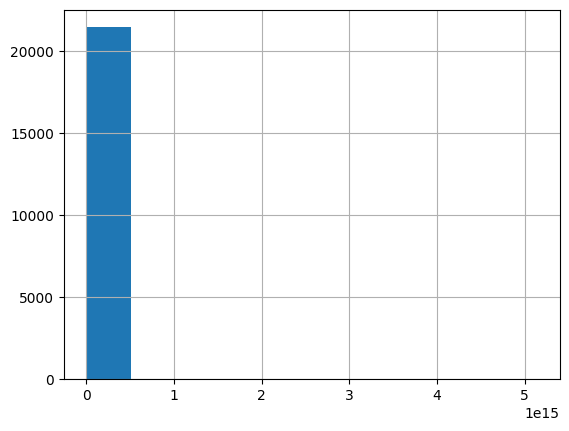

In [42]:
print(df['volume'].min())  # Minimum value
print(df['volume'].max())  # Maximum value
df['volume'].hist()  # Plot histogram (if numeric)

In [43]:
df.head()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,volatility
8247,2,1597604400,16.8.2020 19:00,430.301435,430.135654,430.741640,428.441629,356714082.0,1.226545e+10,4.826443e+10,112199495.0,0.011960
8248,2,1597608000,16.8.2020 20:00,430.085287,429.801257,431.141743,427.776972,416574000.0,1.222196e+10,4.822714e+10,112199495.0,0.011569
8249,2,1597611600,16.8.2020 21:00,430.713171,433.045384,433.292593,430.029907,468160381.0,1.216537e+10,4.859141e+10,112199495.0,0.011214
8250,2,1597615200,16.8.2020 22:00,432.473834,432.853835,434.047175,430.824950,430095286.0,1.205450e+10,4.857017e+10,112199495.0,0.010781
8251,2,1597618800,16.8.2020 23:00,433.107274,432.612346,434.604450,431.156375,441794452.0,1.212066e+10,4.854332e+10,112199495.0,0.010392


In [44]:
from datetime import datetime
df['time'] = pd.to_datetime(df['time']).dt.strftime("%Y-%m-%d %H:%M")
df.head()

<ipython-input-44-ccd20b8893ee>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['time'] = pd.to_datetime(df['time']).dt.strftime("%Y-%m-%d %H:%M")


,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,volatility
8247,2,1597604400,2020-08-16 19:00,430.301435,430.135654,430.741640,428.441629,356714082.0,1.226545e+10,4.826443e+10,112199495.0,0.011960
8248,2,1597608000,2020-08-16 20:00,430.085287,429.801257,431.141743,427.776972,416574000.0,1.222196e+10,4.822714e+10,112199495.0,0.011569
8249,2,1597611600,2020-08-16 21:00,430.713171,433.045384,433.292593,430.029907,468160381.0,1.216537e+10,4.859141e+10,112199495.0,0.011214
8250,2,1597615200,2020-08-16 22:00,432.473834,432.853835,434.047175,430.824950,430095286.0,1.205450e+10,4.857017e+10,112199495.0,0.010781
8251,2,1597618800,2020-08-16 23:00,433.107274,432.612346,434.604450,431.156375,441794452.0,1.212066e+10,4.854332e+10,112199495.0,0.010392


In [47]:
df_500 = df.head(500)
df_500.to_csv('preprocessed_12_cols_500_rows_noNaN_eth_timeseries.csv', index=False)  # index=False prevents row indices from being written

# Download the CSV file
files.download('preprocessed_12_cols_500_rows_noNaN_eth_timeseries.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>